In [1473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# data

In [1474]:
np.random.seed(42)

In [1475]:
def generate_correlated_clusters(n_samples,n_features,n_clusters,correlation=0.5,random_state=None):

    np.random.seed(random_state)

    X_blobs,y_blobs = make_blobs(n_samples=n_samples,centers=n_clusters,n_features=n_features,random_state=random_state)

    centers = np.array([X_blobs[y_blobs == i].mean(axis=0) for i in range(n_clusters)])

    X,y = [],[]

    for i,center in enumerate(centers):
    
        cov_matrix = np.full((n_features,n_features),correlation)  
        np.fill_diagonal(cov_matrix,1)  

        cluster_samples = np.random.multivariate_normal(mean=center,cov=cov_matrix,size=n_samples // n_clusters)

        X.append(cluster_samples)
        y.append(np.full(n_samples // n_clusters, i)) 

    X = np.vstack(X)
    y = np.hstack(y)

    return X, y

In [1476]:
X, y = generate_correlated_clusters(n_samples=1000,n_features=2,n_clusters=2,correlation=0.1,random_state=42)
X = X + np.random.normal(scale=6,size=X.shape) 

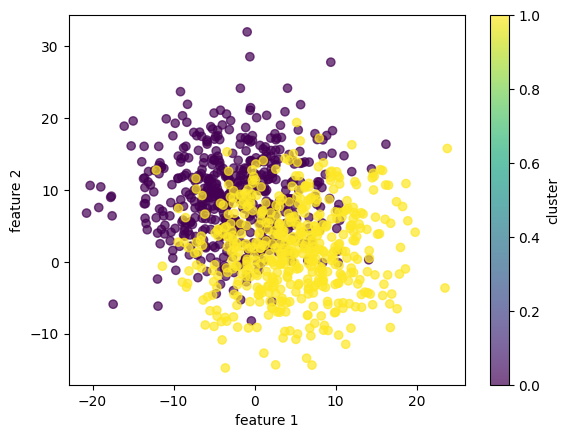

In [1477]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar(label="cluster")
plt.show()

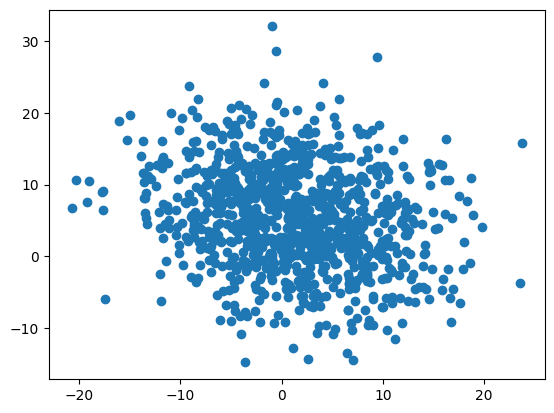

In [1478]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [1479]:
corr_dataset = pd.DataFrame(X) 

In [1480]:
corr_dataset.columns = [f"vab_{col+1}" for col in corr_dataset.columns]

In [1481]:
corr_dataset['target'] = y

In [1482]:
corr_dataset

,vab_1,vab_2,target
0,-6.831659,7.718899,0
1,-8.761505,7.740707,0
2,-13.535939,10.343486,0
3,-4.183721,3.488238,0
4,1.434718,15.384688,0
...,...,...,...
995,-6.537895,-0.864577,1
996,-8.512996,6.150630,1
997,-8.672221,2.678594,1
998,-7.158826,-0.443087,1


In [1483]:
# sns.pairplot(corr_dataset)

## correlation matrix

In [1484]:
corr_dataset.iloc[:,:-1].corr()

,vab_1,vab_2
vab_1,1.000000,-0.229368
vab_2,-0.229368,1.000000


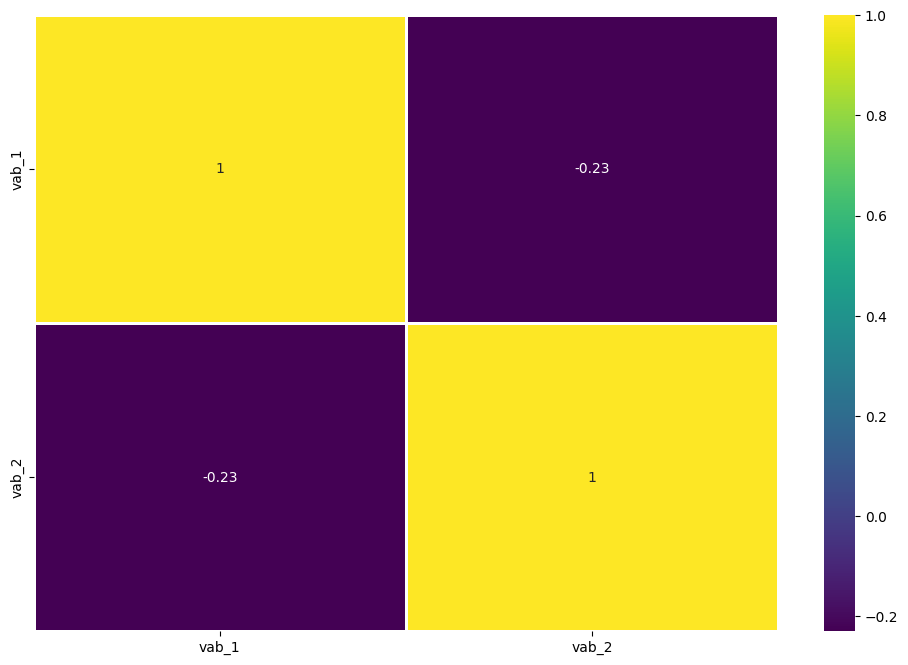

In [1485]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_dataset.iloc[:,:-1].corr(),cmap='viridis',annot=True,linewidths=1)
plt.show()

### data standardization

In [1486]:
X_values = corr_dataset.iloc[:,:-1].values

In [1487]:
y_values = corr_dataset.iloc[:,-1].values

In [1488]:
from sklearn.preprocessing import StandardScaler

In [1489]:
scaler = StandardScaler()

In [1490]:
X_values = scaler.fit_transform(X_values)

In [1491]:
np.mean(X_values),np.std(X_values)

(-1.9451107391432743e-16, 0.9999999999999998)

In [1492]:
pd.DataFrame(X_values)

,0,1
0,-1.095994,0.305777
1,-1.367167,0.308852
2,-2.038047,0.675812
3,-0.723919,-0.290695
4,0.065556,1.386560
...,...,...
995,-1.054716,-0.904389
996,-1.332248,0.084670
997,-1.354621,-0.404845
998,-1.141966,-0.844964


<Axes: ylabel='Density'>

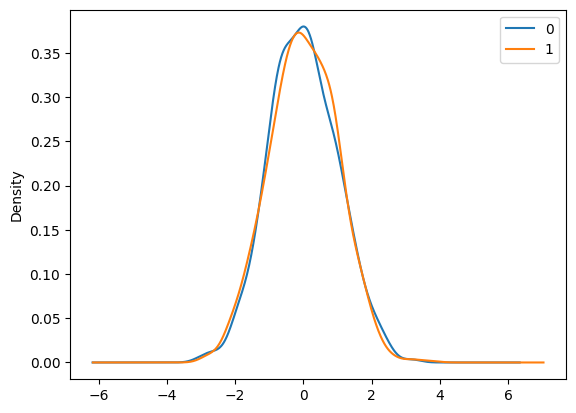

In [1493]:
pd.DataFrame(X_values).plot(kind='density')

## pca application

In [1494]:
from sklearn.decomposition import PCA

In [1495]:
pca_general = PCA()

In [1496]:
pca_general.fit(X_values)

PCA()

In [1497]:
explained_variance = pca_general.explained_variance_ratio_

In [1498]:
explained_variance

array([0.61468382, 0.38531618])

In [1499]:
eigenvalues = pca_general.explained_variance_

In [1500]:
pd.DataFrame(eigenvalues)

,0
0,1.230598
1,0.771404


In [1501]:
eigenvectors = pca_general.components_

### scree plot

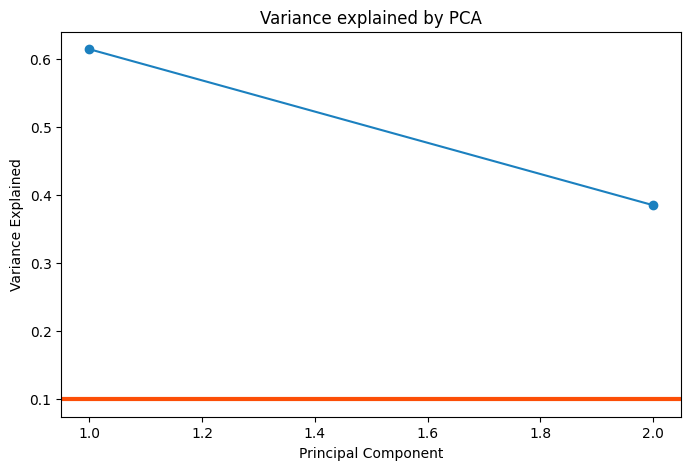

In [1502]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [1503]:
pca = PCA(n_components=2)

In [1504]:
principal_components = pca.fit_transform(X_values)

In [1505]:
pd.DataFrame(principal_components).head(8)

,0,1
0,0.991202,-0.558768
1,1.185124,-0.748342
2,1.918988,-0.963246
3,0.306336,-0.717440
4,0.934091,1.026802
5,1.133772,-1.342736
6,0.334499,-1.053344
7,0.008633,0.636610


In [1506]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [1507]:
final_df = pd.concat([principal_df,corr_dataset[['target']]],axis = 1)

In [1508]:
final_df

,principal component 1,principal component 2,target
0,0.991202,-0.558768,0
1,1.185124,-0.748342,0
2,1.918988,-0.963246,0
3,0.306336,-0.717440,0
4,0.934091,1.026802,0
...,...,...,...
995,0.106297,-1.385297,1
996,1.001912,-0.882171,1
997,0.671593,-1.244130,1
998,0.210012,-1.404972,1


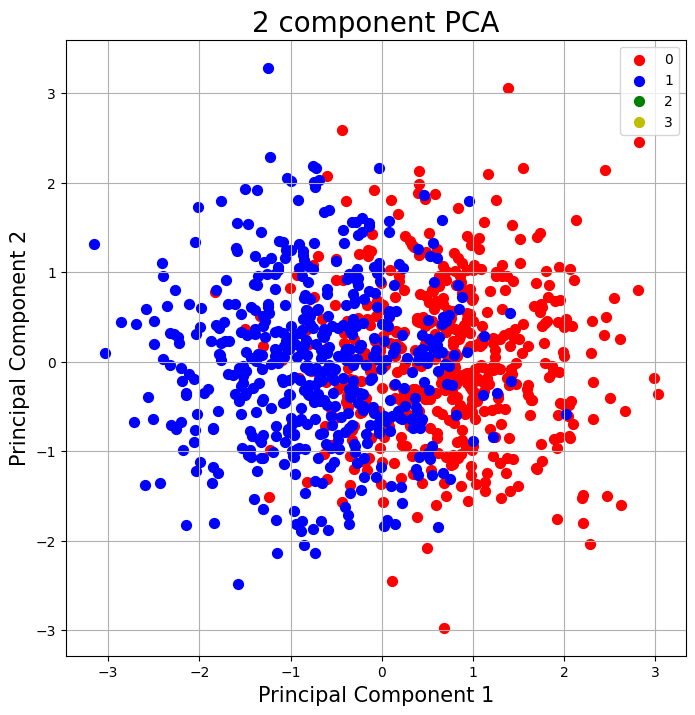

In [1509]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

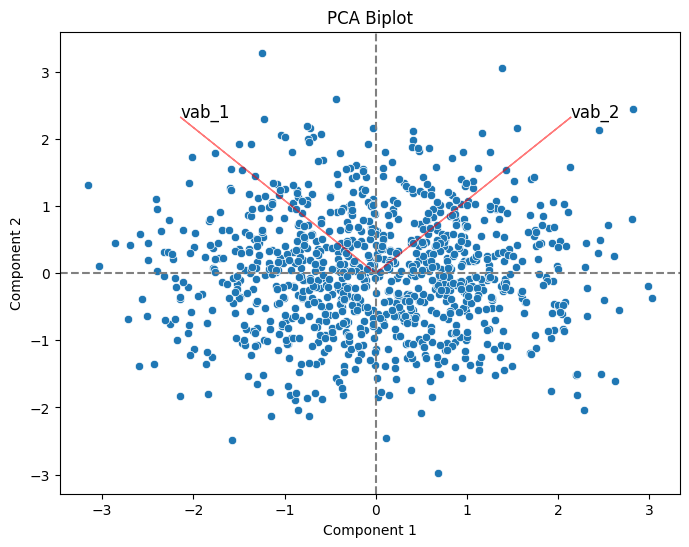

In [1510]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

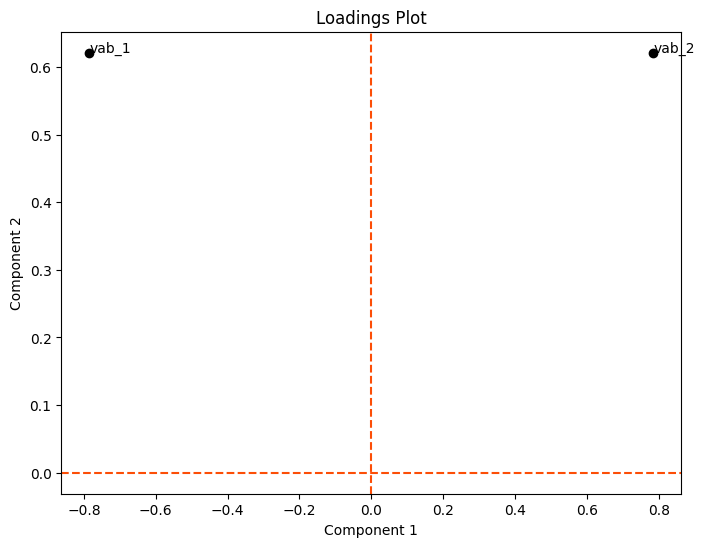

In [1511]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [1512]:
scores_pca = pca.transform(X_values)

In [1513]:
pd.DataFrame(scores_pca).head()

,0,1
0,0.991202,-0.558768
1,1.185124,-0.748342
2,1.918988,-0.963246
3,0.306336,-0.717440
4,0.934091,1.026802


## t-SNE

In [1514]:
from sklearn.manifold import TSNE

In [1515]:
tsne = TSNE(n_components=2,random_state=42)

In [1516]:
X_tsne = tsne.fit_transform(X_values)

In [1517]:
tsne_data = pd.concat([pd.DataFrame(X_tsne,columns=('dim_1','dim_2')),corr_dataset['target']],axis=1)

In [1518]:
tsne_data

,dim_1,dim_2,target
0,21.010347,-11.008331,0
1,23.139248,-15.479180,0
2,33.216434,-13.897078,0
3,7.094006,-17.272367,0
4,15.493345,23.264412,0
...,...,...,...
995,-2.922516,-26.260843,1
996,20.128437,-17.588232,1
997,16.330326,-22.468996,1
998,-1.909281,-26.522717,1


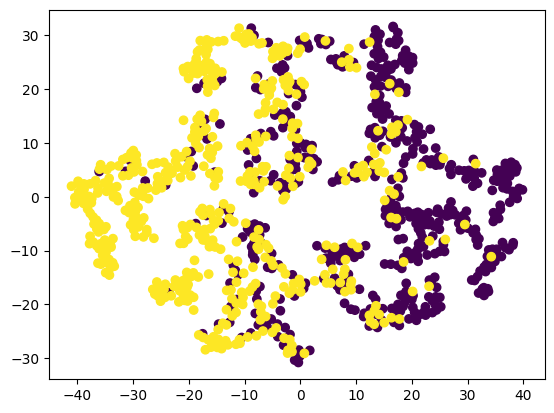

In [1519]:
plt.scatter(x=tsne_data['dim_1'],y=tsne_data['dim_2'],c=tsne_data['target'])
plt.show()

In [1520]:
tsne.kl_divergence_

0.4893057346343994

## UMAP

In [1521]:
import umap

In [1522]:
umap = umap.UMAP(random_state=42)

In [1523]:
X_UMAP = umap.fit_transform(X_values)

In [1524]:
UMAP_data = pd.concat([pd.DataFrame(X_UMAP,columns=('dim_1','dim_2')),corr_dataset['target']],axis=1)

In [1525]:
UMAP_data

,dim_1,dim_2,target
0,1.096859,3.508871,0
1,1.123976,1.876492,0
2,0.105429,0.762408,0
3,3.738891,3.073792,0
4,1.093482,10.309801,0
...,...,...,...
995,4.582998,1.197661,1
996,2.011591,1.825454,1
997,2.948277,1.365449,1
998,4.400419,1.157601,1


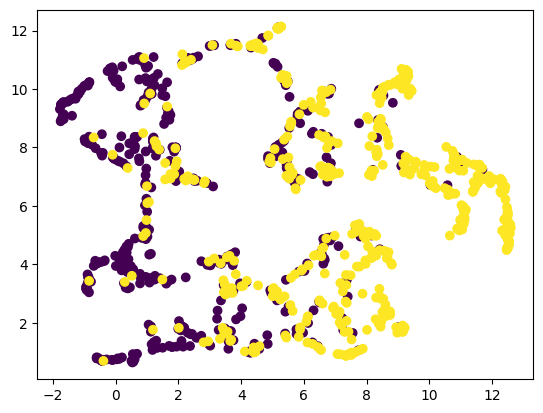

In [1526]:
plt.scatter(UMAP_data['dim_1'],UMAP_data['dim_2'],c=UMAP_data['target'])
plt.show()

## k-means 

In [1527]:
from sklearn.cluster import KMeans

In [1528]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [1529]:
kmeans.fit(X_values)

KMeans(n_clusters=2, random_state=42)

In [1530]:
df_kmeans = corr_dataset.copy()

In [1531]:
df_kmeans['k_means'] = kmeans.labels_

In [1532]:
df_kmeans

,vab_1,vab_2,target,k_means
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


In [1533]:
from scipy.optimize import linear_sum_assignment

y_true = df_kmeans['target'].values  
y_kmeans = df_kmeans['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_kmeans['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_kmeans['k_means'] == y_true))

accuracy before: 0.792
accuracy after: 0.792


In [1534]:
df_kmeans

,vab_1,vab_2,target,k_means
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


In [1535]:
print(np.unique(df_kmeans['target']))

[0 1]


In [1536]:
print(np.unique(kmeans.labels_))

[0 1]


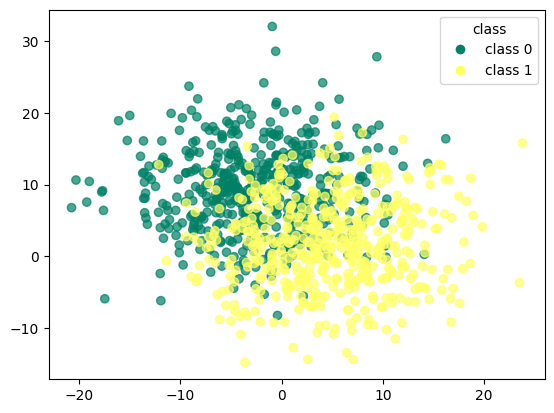

In [1537]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], 
                      c=df_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

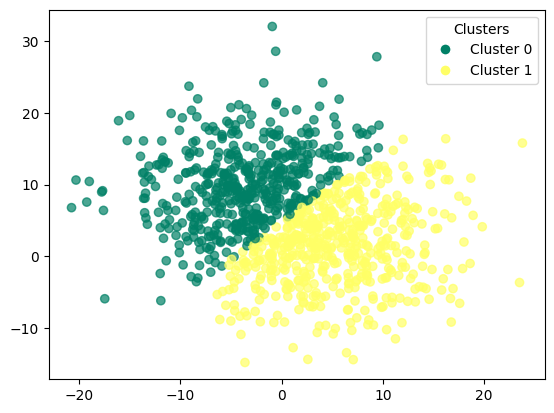

In [1538]:
scatter = plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], 
                      c=df_kmeans['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_kmeans['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [1539]:
kmeans.cluster_centers_

array([[-0.66997106,  0.64014609],
       [ 0.63856617, -0.61013924]])

In [1540]:
print(confusion_matrix(df_kmeans['target'],df_kmeans['k_means']))

[[390 110]
 [ 98 402]]


In [1541]:
print(classification_report(df_kmeans['target'],df_kmeans['k_means']))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       500
           1       0.79      0.80      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



### k-means with pca

In [1542]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [1543]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [1544]:
df_pca_kmeans = corr_dataset.copy()

In [1545]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [1546]:
df_pca_kmeans

,vab_1,vab_2,target,kmeans_pca
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


In [1547]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.792
accuracy after: 0.792


In [1548]:
df_pca_kmeans

,vab_1,vab_2,target,kmeans_pca
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


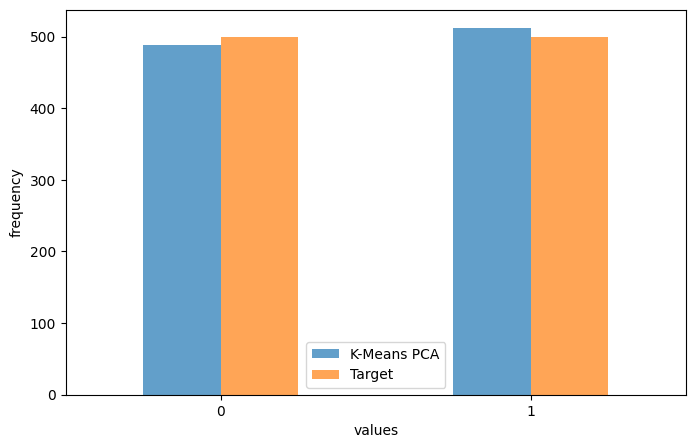

In [1549]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [1550]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[390 110]
 [ 98 402]]


In [1551]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       500
           1       0.79      0.80      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



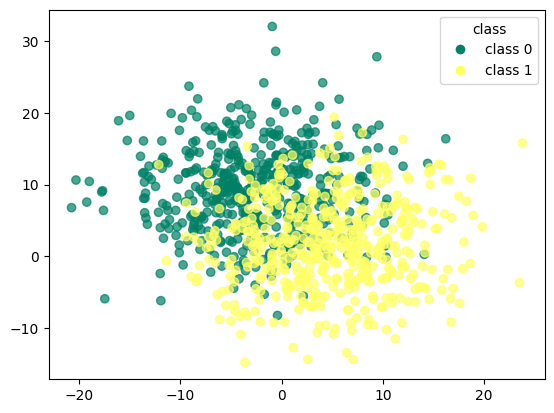

In [1552]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

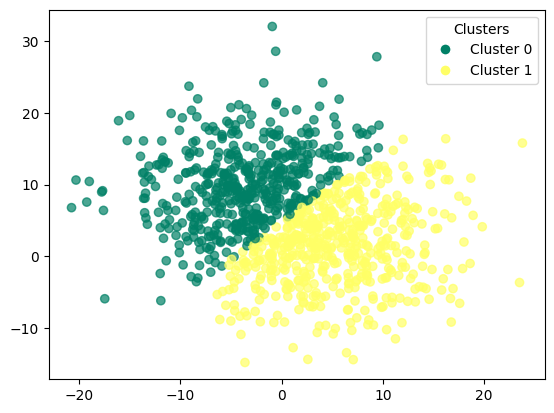

In [1553]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

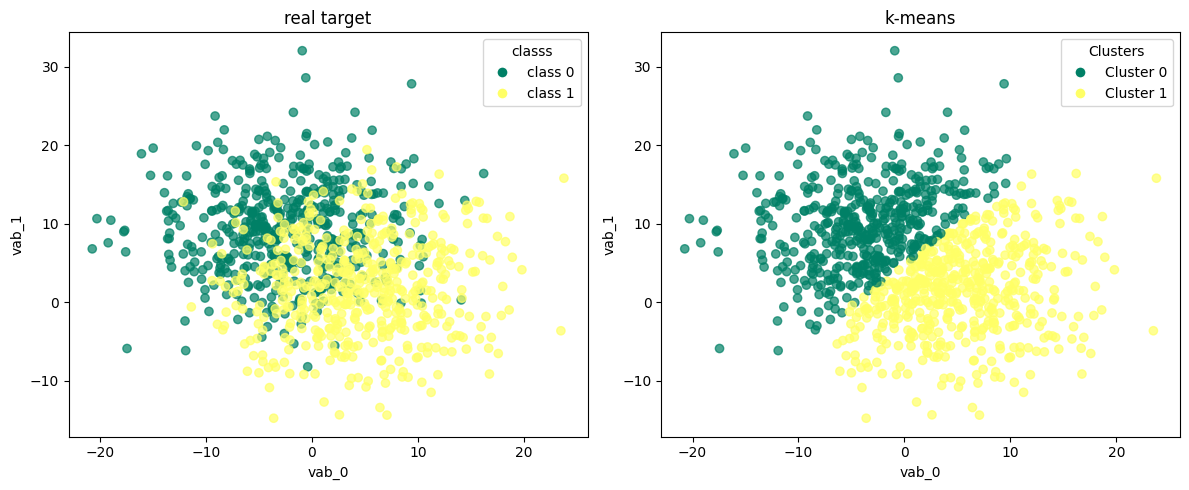

In [1554]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

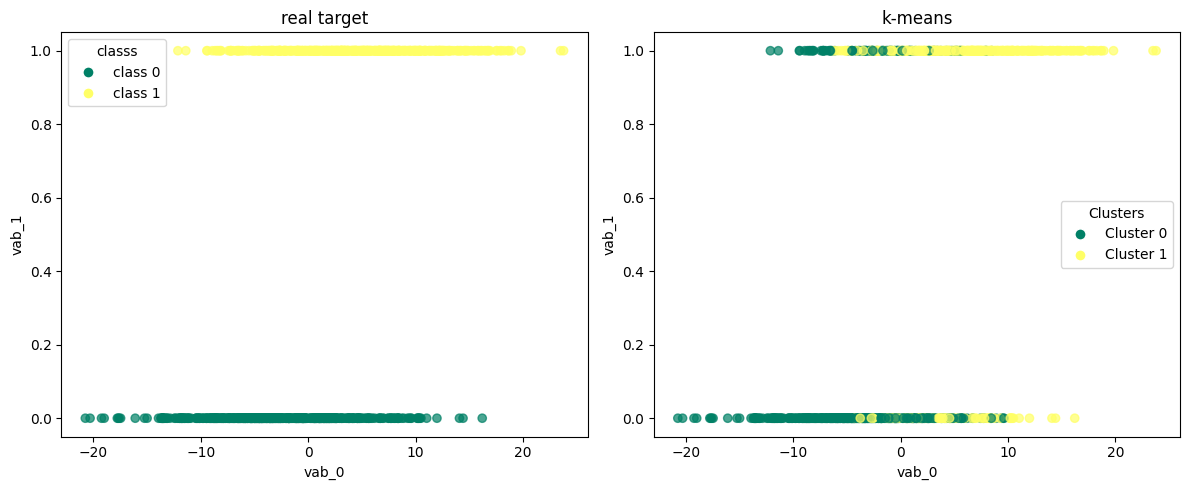

In [1555]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

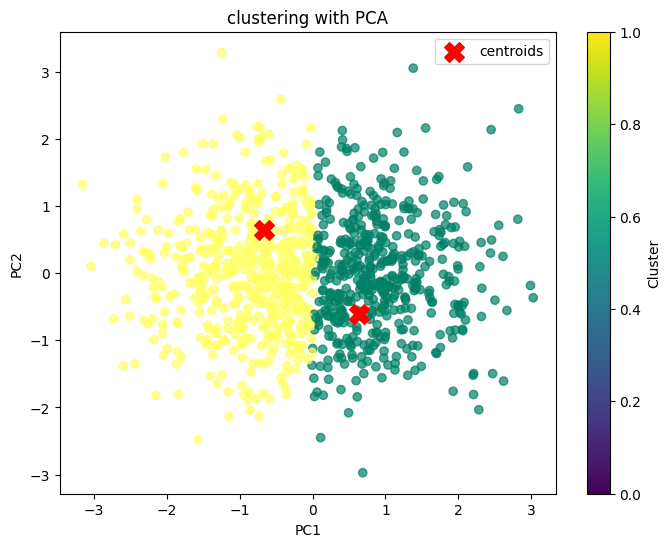

In [1556]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

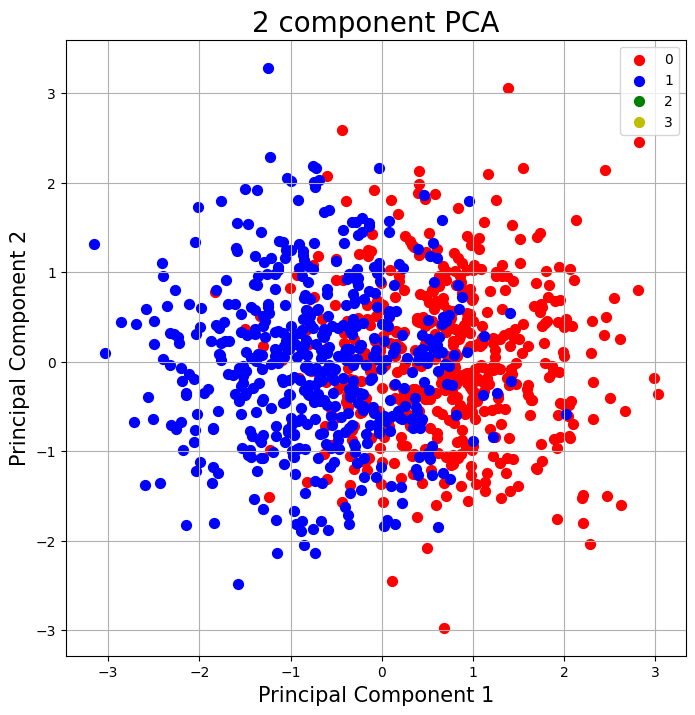

In [1557]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### k-means with t-SNE

In [1558]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [1559]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2, random_state=42)

In [1560]:
df_tsne_kmeans = corr_dataset.copy()

In [1561]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [1562]:
df_tsne_kmeans

,vab_1,vab_2,target,kmeans_tsne
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,1
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,1


In [1563]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.789
accuracy after: 0.789


In [1564]:
df_tsne_kmeans

,vab_1,vab_2,target,kmeans_tsne
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,1
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,1


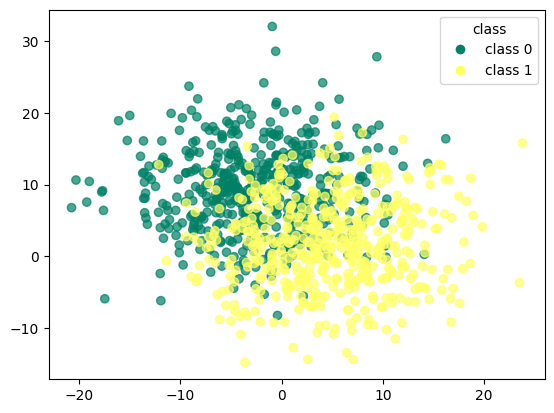

In [1565]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

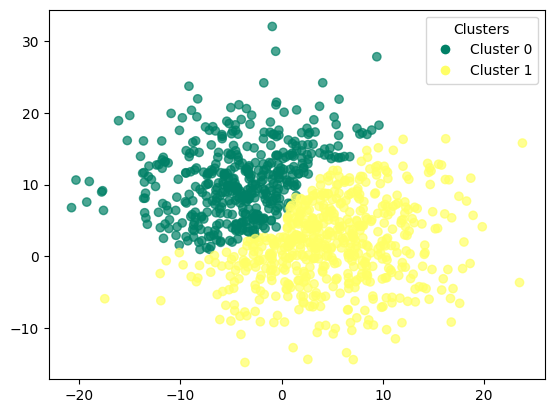

In [1566]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

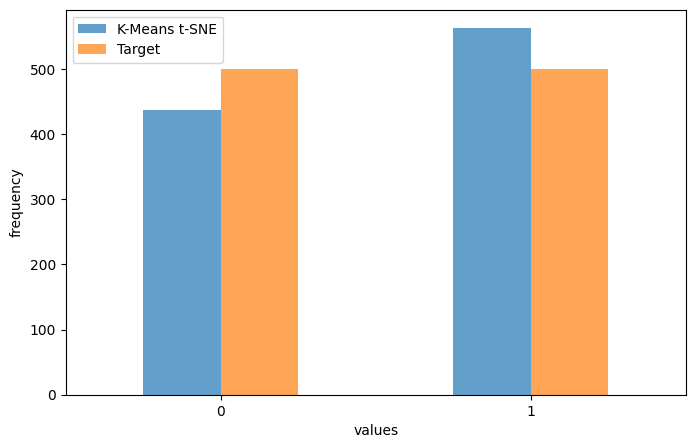

In [1567]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [1568]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[363 137]
 [ 74 426]]


In [1569]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       500
           1       0.76      0.85      0.80       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



### k-means with UMAP

In [1570]:
kmeans_UMAP = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [1571]:
kmeans_UMAP.fit(X_UMAP)

KMeans(n_clusters=2, random_state=42)

In [1572]:
df_UMAP_kmeans = corr_dataset.copy()

In [1573]:
df_UMAP_kmeans['kmeans_UMAP'] = kmeans_UMAP.labels_

In [1574]:
df_UMAP_kmeans

,vab_1,vab_2,target,kmeans_UMAP
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


In [1575]:
y_true = df_UMAP_kmeans['target'].values  
y_kmeans = df_UMAP_kmeans['kmeans_UMAP'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_UMAP_kmeans['kmeans_UMAP'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_UMAP_kmeans['kmeans_UMAP'] == y_true))

accuracy before: 0.786
accuracy after: 0.786


In [1576]:
df_UMAP_kmeans

,vab_1,vab_2,target,kmeans_UMAP
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


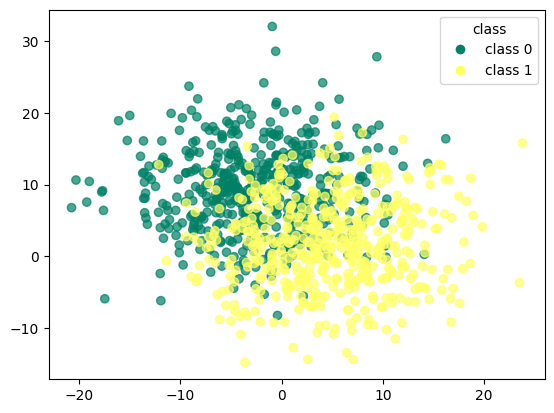

In [1577]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_UMAP_kmeans.iloc[:, 0], df_UMAP_kmeans.iloc[:, 1], 
                      c=df_UMAP_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_UMAP_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

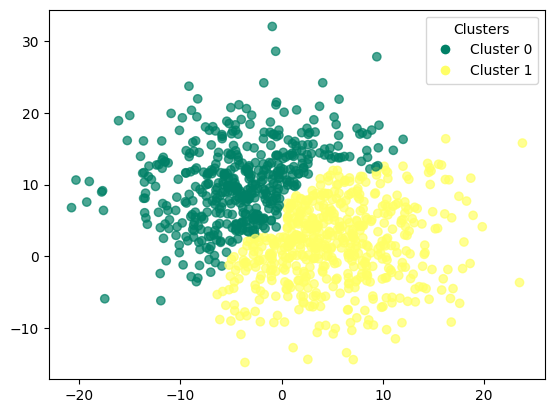

In [1578]:
scatter = plt.scatter(df_UMAP_kmeans.iloc[:, 0], df_UMAP_kmeans.iloc[:, 1], 
                      c=df_UMAP_kmeans['kmeans_UMAP'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_UMAP_kmeans['kmeans_UMAP'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

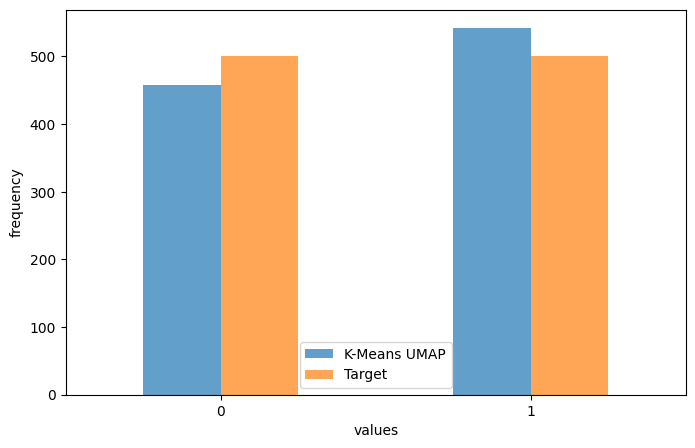

In [1579]:
counts_kmeans = df_UMAP_kmeans['kmeans_UMAP'].value_counts().sort_index()
counts_target = df_UMAP_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means UMAP': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means UMAP", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [1580]:
print(confusion_matrix(df_UMAP_kmeans['target'],df_UMAP_kmeans['kmeans_UMAP']))

[[372 128]
 [ 86 414]]


In [1581]:
print(classification_report(df_UMAP_kmeans['target'],df_UMAP_kmeans['kmeans_UMAP'])) 

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       500
           1       0.76      0.83      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



## t-clustering

In [1582]:
def trimmed_clustering(X,n_clusters,trim_fraction=0.1):

    kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(X)
    distances = np.min(kmeans.transform(X),axis=1)
    
    trim_threshold = np.percentile(distances,100 * (1 - trim_fraction))
    trimmed_X = X[distances < trim_threshold]
    trimmed_indices = np.where(distances < trim_threshold)[0]
    trimmed_kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(trimmed_X)
    
    return trimmed_kmeans,trimmed_indices

In [1583]:
trimmed_kmeans,trimmmed_indces = trimmed_clustering(X_values,n_clusters=2,trim_fraction=0.1)

In [1584]:
trimmed_kmeans

KMeans(n_clusters=2, random_state=42)

In [1585]:
df_t_clust = corr_dataset.copy()

In [1586]:
df_t_clust = df_t_clust.iloc[trimmmed_indces]  

In [1587]:
df_t_clust['t_clust'] = trimmed_kmeans.labels_

In [1588]:
df_t_clust

,vab_1,vab_2,target,t_clust
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


In [1589]:
from scipy.optimize import linear_sum_assignment

y_true = df_t_clust['target'].values  
y_kmeans = df_t_clust['t_clust'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_t_clust['t_clust'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_t_clust['t_clust'] == y_true))

accuracy before: 0.7811111111111111
accuracy after: 0.7811111111111111


In [1590]:
df_t_clust

,vab_1,vab_2,target,t_clust
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


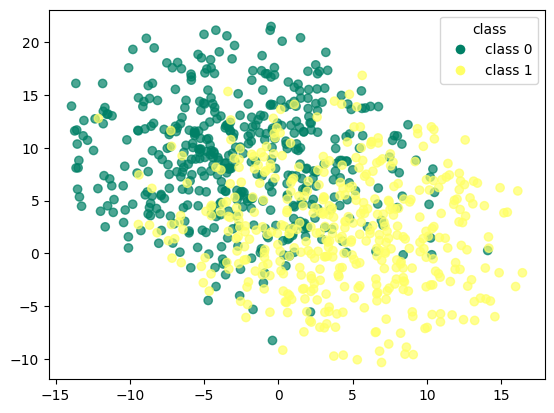

In [1591]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_t_clust.iloc[:, 0], df_t_clust.iloc[:, 1], 
                      c=df_t_clust['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_t_clust['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

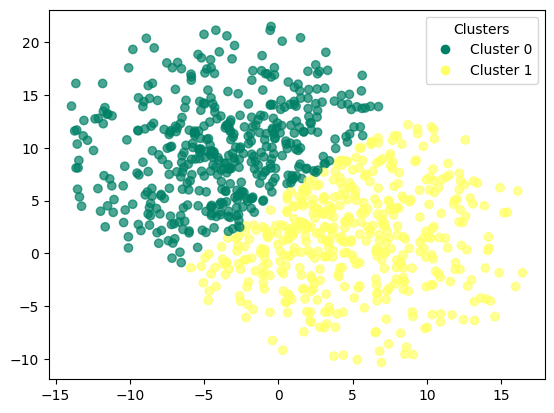

In [1592]:
scatter = plt.scatter(df_t_clust.iloc[:, 0], df_t_clust.iloc[:, 1], 
                      c=df_t_clust['t_clust'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_t_clust['t_clust'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [1593]:
print(confusion_matrix(df_t_clust['target'],df_t_clust['t_clust']))

[[353 110]
 [ 87 350]]


In [1594]:
print(classification_report(df_t_clust['target'],df_t_clust['t_clust']))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       463
           1       0.76      0.80      0.78       437

    accuracy                           0.78       900
   macro avg       0.78      0.78      0.78       900
weighted avg       0.78      0.78      0.78       900



### t-clustering with pca

In [1595]:
t_clust_pca,trimmmed_indices = trimmed_clustering(scores_pca,n_clusters=2,trim_fraction=0.1)

In [1596]:
t_clust_pca

KMeans(n_clusters=2, random_state=42)

In [1597]:
df_pca_t_clust = corr_dataset.copy()

In [1598]:
df_pca_t_clust = df_pca_t_clust.iloc[trimmmed_indces]  

In [1599]:
df_pca_t_clust["t_clust_pca"] = t_clust_pca.labels_

In [1600]:
df_pca_t_clust

,vab_1,vab_2,target,t_clust_pca
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


In [1601]:
y_true = df_pca_t_clust['target'].values  
y_kmeans = df_pca_t_clust['t_clust_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_t_clust['t_clust_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_t_clust['t_clust_pca'] == y_true))

accuracy before: 0.7811111111111111
accuracy after: 0.7811111111111111


In [1602]:
df_pca_t_clust

,vab_1,vab_2,target,t_clust_pca
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


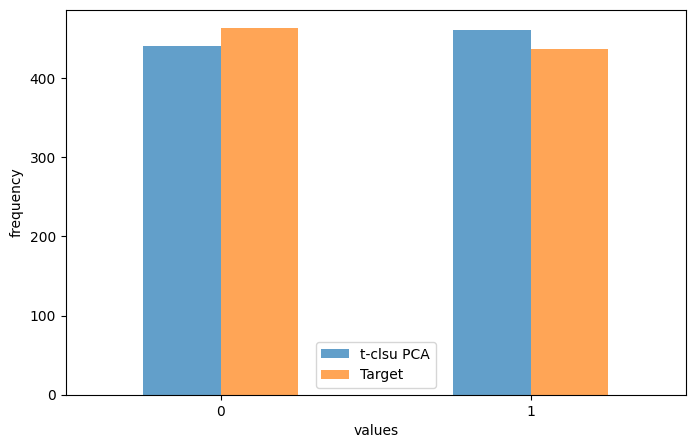

In [1603]:
counts_kmeans = df_pca_t_clust['t_clust_pca'].value_counts().sort_index()
counts_target = df_pca_t_clust['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'t-clust PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["t-clsu PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [1604]:
print(confusion_matrix(df_pca_t_clust['target'],df_pca_t_clust['t_clust_pca']))

[[353 110]
 [ 87 350]]


In [1605]:
print(classification_report(df_pca_t_clust['target'],df_pca_t_clust['t_clust_pca']))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       463
           1       0.76      0.80      0.78       437

    accuracy                           0.78       900
   macro avg       0.78      0.78      0.78       900
weighted avg       0.78      0.78      0.78       900



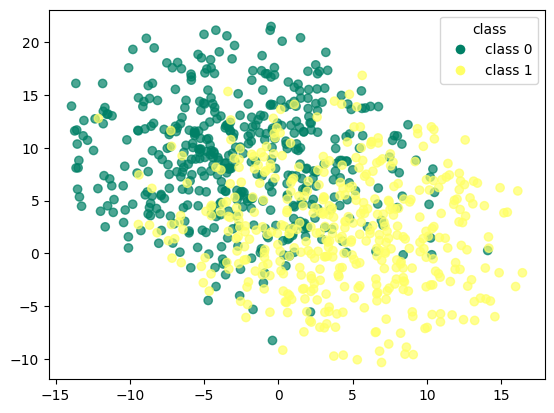

In [1606]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_t_clust.iloc[:, 0], df_pca_t_clust.iloc[:, 1], 
                      c=df_pca_t_clust['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_t_clust['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

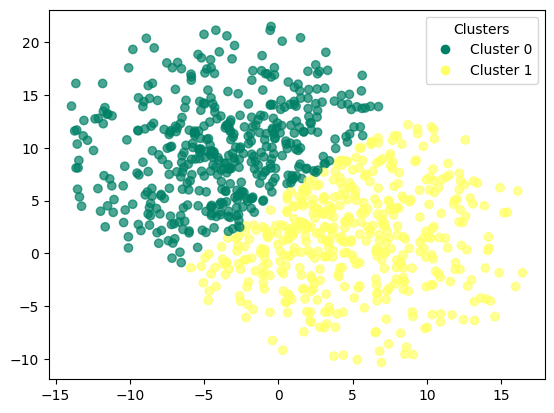

In [1607]:
scatter = plt.scatter(df_pca_t_clust.iloc[:, 0], df_pca_t_clust.iloc[:, 1], 
                      c=df_pca_t_clust['t_clust_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_t_clust['t_clust_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

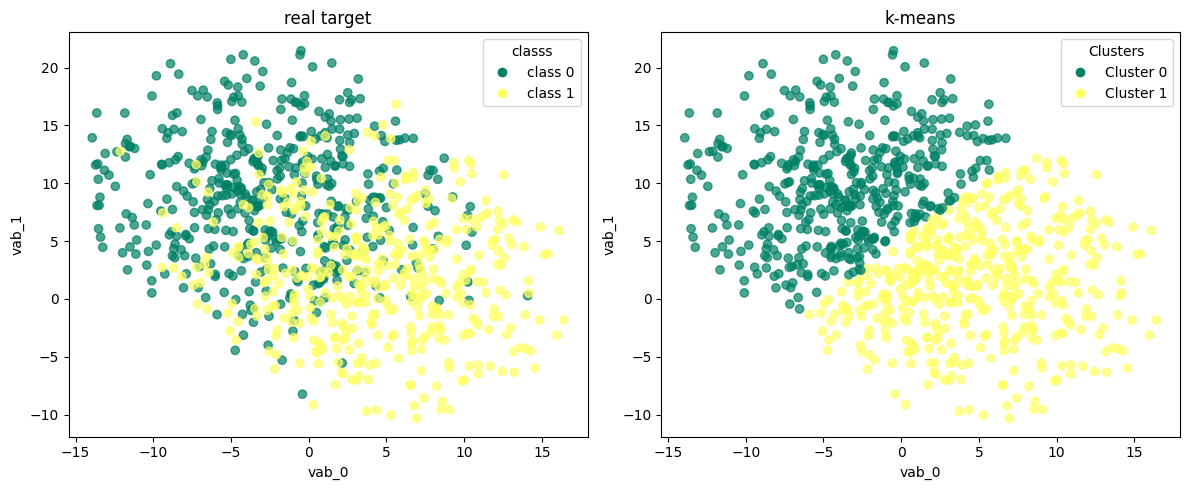

In [1608]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_t_clust.iloc[:, 0], df_pca_t_clust.iloc[:, 1], 
                           c=df_pca_t_clust['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_t_clust['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_t_clust.iloc[:, 0], df_pca_t_clust.iloc[:, 1], 
                           c=df_pca_t_clust['t_clust_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_t_clust['t_clust_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

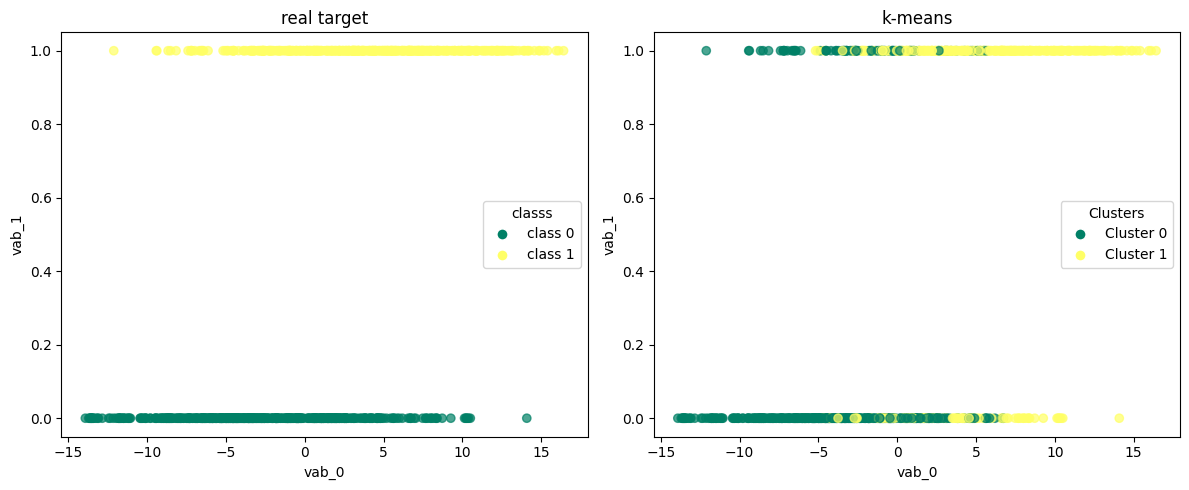

In [1609]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_t_clust.iloc[:, 0], df_pca_t_clust.iloc[:, 2], 
                           c=df_pca_t_clust['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_t_clust['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_t_clust.iloc[:, 0], df_pca_t_clust.iloc[:, 2], 
                           c=df_pca_t_clust['t_clust_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_t_clust['t_clust_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

# overall results k-means

In [1610]:
print(classification_report(df_UMAP_kmeans['target'],df_UMAP_kmeans['kmeans_UMAP'])) 

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       500
           1       0.76      0.83      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



In [1611]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       500
           1       0.76      0.85      0.80       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



In [1612]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       500
           1       0.79      0.80      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



In [1613]:
print(classification_report(df_kmeans['target'],df_kmeans['k_means']))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       500
           1       0.79      0.80      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



# overall results t-clustering

In [1615]:
print(classification_report(df_t_clust['target'],df_t_clust['t_clust']))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       463
           1       0.76      0.80      0.78       437

    accuracy                           0.78       900
   macro avg       0.78      0.78      0.78       900
weighted avg       0.78      0.78      0.78       900



In [1616]:
print(classification_report(df_pca_t_clust['target'],df_pca_t_clust['t_clust_pca']))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       463
           1       0.76      0.80      0.78       437

    accuracy                           0.78       900
   macro avg       0.78      0.78      0.78       900
weighted avg       0.78      0.78      0.78       900

